In [23]:
pip install xlrd

     |████████████████████████████████| 112kB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

In [30]:
pip install geopy

     |████████████████████████████████| 102kB 2.8MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


#from geopy.geocoders import Nominatim
#from geopy.distance import vincenty
#import datetime as DT
#import hmac
#import pandas as pd
#import io
#import requests


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



ModuleNotFoundError: No module named 'geopy'

In [32]:
from geopy.geocoders import Nominatim 
#from geopy.geocoders import Nominatim
#from geopy.distance import vincent

In [24]:
df4 = pd.read_excel('LAcoor2.xlsx', sheet_name='Sheet1')
df4

,City,Latitude,Longitude,Population,Median Age,Average Income,Venue Number
0,Culver City,34.005820,-118.396781,39283,40.9,86997,9
1,El Segundo,33.917145,-118.401554,16853,38.7,92942,11
2,Hawthorne,33.914775,-118.348083,87854,33.0,47636,23
3,Hermosa Beach,33.865268,-118.396297,19708,39.5,124849,66
4,Inglewood,33.956068,-118.344274,110598,34.5,46389,8
5,Manhattan Beach,33.889632,-118.397370,35924,43.7,148899,26
6,Marina del Rey,33.981510,-118.453229,8866,39.0,101860,20
7,Redondo Beach,33.856817,-118.377137,67908,40.2,104548,8
8,Santa Monica,34.023413,-118.481666,92306,40.5,86084,21
9,Torrance,33.834966,-118.341431,146758,41.7,85070,4


In [33]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [35]:
# create map of New York using latitude and longitude values
map_losangeles = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, City in zip(df4['Latitude'], df4['Longitude'], df4['City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_losangeles)  
    
map_losangeles

'East Los Angeles'

In [37]:
CLIENT_ID = 'PJS5VPSQJK5GSZVFE2QVMOMLPYLINYY1XLXGOU31EELHT1MJ' # your Foursquare ID
CLIENT_SECRET = 'GPZVYLDEHPZPGQ0RPXZHNSQU2T3TDWNY2DGDP5H1H4EM5GRR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PJS5VPSQJK5GSZVFE2QVMOMLPYLINYY1XLXGOU31EELHT1MJ
CLIENT_SECRET:GPZVYLDEHPZPGQ0RPXZHNSQU2T3TDWNY2DGDP5H1H4EM5GRR


In [39]:
df4.loc[7, 'City']

'Redondo Beach'

In [42]:
neighborhood_latitude = df4.loc[7, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df4.loc[7, 'Longitude'] # neighborhood longitude value

neighborhood_name = df4.loc[5, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Manhattan Beach are 33.856817, -118.377137.


In [43]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 4828 #4828 define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PJS5VPSQJK5GSZVFE2QVMOMLPYLINYY1XLXGOU31EELHT1MJ&client_secret=GPZVYLDEHPZPGQ0RPXZHNSQU2T3TDWNY2DGDP5H1H4EM5GRR&v=20180605&ll=33.856817,-118.377137&radius=4828&limit=100'

In [44]:
results = requests.get(url).json()


In [45]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [46]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,"iLoveKickboxing - Redondo Beach, CA",Gym,33.854484,-118.379196
1,Fly Studios Kidz Aerial Arts,Summer Camp,33.850126,-118.388656
2,HopSaint Brewing Company,Brewery,33.857771,-118.367726
3,Ocean Diner,Diner,33.863341,-118.390393
4,Big Mike's Philly Cheesesteak And Subs,Sandwich Place,33.858513,-118.367264


In [47]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
manhattan_venues = getNearbyVenues(names=df4['City'],
                                   latitudes=df4['Latitude'],
                                   longitudes=df4['Longitude']
                                  )


Culver City
El Segundo
Hawthorne
Hermosa Beach
Inglewood
Manhattan Beach
Marina del Rey
Redondo Beach
Santa Monica
Torrance
Venice Beach


In [54]:
print(manhattan_venues.shape)
manhattan_venues.head()

(216, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Culver City,34.00582,-118.396781,Lindberg Park,34.003238,-118.398011,Playground
1,Culver City,34.00582,-118.396781,Ralphs,34.002368,-118.393548,Supermarket
2,Culver City,34.00582,-118.396781,Pizza Hut,34.002809,-118.393751,Pizza Place
3,Culver City,34.00582,-118.396781,Redbox,34.002558,-118.393167,Video Store
4,Culver City,34.00582,-118.396781,The Spot Cafe & Lounge,34.009331,-118.398429,Coffee Shop


In [55]:
df3 = manhattan_venues.groupby('City').count() 
manhattan_venues.groupby('City').count() 
df3 = df3.drop(columns=['City Latitude', 'City Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])
df3 = df3.sort_values(by=['Venue'])
manhattan_venues.groupby('City').count() 

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Culver City,9,9,9,9,9,9
El Segundo,10,10,10,10,10,10
Hawthorne,20,20,20,20,20,20
Hermosa Beach,62,62,62,62,62,62
Inglewood,7,7,7,7,7,7
Manhattan Beach,26,26,26,26,26,26
Marina del Rey,20,20,20,20,20,20
Redondo Beach,8,8,8,8,8,8
Santa Monica,21,21,21,21,21,21


In [56]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 112 uniques categories.


In [57]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['City'] = manhattan_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Board Shop,Boat or Ferry,Boutique,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Canal,Carpet Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Farmers Market,Fast Food Restaurant,Food Truck,French Restaurant,Gas Station,Gastropub,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Mobile Phone Shop,New American Restaurant,Office,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Recreation Center,Rental Car Location,Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Smoke Shop,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vineyard,Wine Bar,Wine Shop,Yoga Studio
0,Culver City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Culver City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Culver City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Culver City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Culver City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
manhattan_onehot.shape

(216, 113)

In [59]:
manhattan_grouped = manhattan_onehot.groupby('City').mean().reset_index()
manhattan_grouped

,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Board Shop,Boat or Ferry,Boutique,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Canal,Carpet Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Farmers Market,Fast Food Restaurant,Food Truck,French Restaurant,Gas Station,Gastropub,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Mobile Phone Shop,New American Restaurant,Office,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Recreation Center,Rental Car Location,Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Smoke Shop,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vineyard,Wine Bar,Wine Shop,Yoga Studio
0,Culver City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000
1,El Segundo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.1,0.000000,0.000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Hawthorne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.100000,0.000000,0.000000,0.100,0.0,0.000000,0.000,0.050000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.1,0.000000,0.000000,0.05,0.05,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.000

In [28]:
manhattan_grouped.shape

(11, 112)

In [60]:
num_top_venues = 5
for hood in manhattan_grouped['City']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Culver City----
                     venue  freq
0              Supermarket  0.11
1  Health & Beauty Service  0.11
2              Coffee Shop  0.11
3               Food Truck  0.11
4               Playground  0.11


----El Segundo----
                  venue  freq
0             Pet Store   0.4
1                   Gym   0.1
2            Distillery   0.1
3    Athletics & Sports   0.1
4  Fast Food Restaurant   0.1


----Hawthorne----
                       venue  freq
0       Fast Food Restaurant  0.15
1  Latin American Restaurant  0.10
2          Mobile Phone Shop  0.10
3             Discount Store  0.10
4          Convenience Store  0.10


----Hermosa Beach----
                  venue  freq
0    Italian Restaurant  0.05
1           Coffee Shop  0.05
2           Yoga Studio  0.03
3  Gym / Fitness Center  0.03
4   American Restaurant  0.03


----Inglewood----
                       venue  freq
0          Convenience Store  0.14
1                 Steakhouse  0.14
2                   Wi

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = manhattan_grouped['City']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Culver City,Park,Food Truck,Health & Beauty Service,Video Store,Diner,Coffee Shop,Playground,Pizza Place,Supermarket,Donut Shop
1,El Segundo,Pet Store,Office,Distillery,Athletics & Sports,Gym / Fitness Center,Gym,Fast Food Restaurant,Gas Station,Diner,Discount Store
2,Hawthorne,Fast Food Restaurant,Convenience Store,Mobile Phone Shop,Discount Store,Latin American Restaurant,Donut Shop,Coffee Shop,Supplement Shop,Martial Arts Dojo,Taco Place
3,Hermosa Beach,Italian Restaurant,Coffee Shop,Yoga Studio,Sushi Restaurant,American Restaurant,Mexican Restaurant,Grocery Store,Restaurant,Gym / Fitness Center,Theater
4,Inglewood,Stadium,Wine Bar,Convenience Store,Steakhouse,Cajun / Creole Restaurant,Southern / Soul Food Restaurant,Smoke Shop,Dog Run,Farmers Market,Donut Shop
5,Manhattan Beach,Bank,Hotel,Sports Bar,Automotive Shop,Sandwich Place,Seafood Restaurant,Shipping Store,Mobile Phone Shop,Big Box Store,Coffee Shop
6,Marina del Rey,Beach,American Restaurant,Harbor / Marina,Hotel,Seafood Restaurant,Boat or Ferry,Resort,Pool,Pizza Place,Restaurant
7,Redondo Beach,Japanese Restaurant,Gym,Chinese Restaurant,Discount Store,Dog Run,Pizza Place,Grocery Store,Park,Gym / Fitness Center,Farmers Market
8,Santa Monica,Rental Car Location,Supermarket,Juice Bar,Gym,Fast Food Restaurant,New American Restaurant,Park,Donut Shop,Performing Arts Venue,Convenience Store
9,Torrance,Convenience Store,Recreation Center,Vineyard,Pool,French Restaurant,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar


In [67]:
kclusters = 3

#manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 


km = KMeans(n_clusters=3)
km
y_predicted = km.fit_predict(df4[['Average Income', 'Venue Number']])
y_predicted


df4['cluster'] = y_predicted

df4['Median Age'] = df4['Median Age'].astype(int)

df4['Population'] = df4['Population'].astype(float)
df4['Median Age'] = df4['Median Age'].astype(float)
df4['Average Income'] = df4['Average Income'].astype(float)
df4['Venue Number'] = df4['Venue Number'].astype(float)
df4['cluster'] = df4['cluster'].astype(float)
df4.dtypes

df41 = df4[df4.cluster==0]
df42 = df4[df4.cluster==1]
df43 = df4[df4.cluster==2]

plt.scatter(df41['Average Income'],df41['Venue Number'],color='green')
plt.scatter(df42['Average Income'],df42['Venue Number'],color='red')
plt.scatter(df43['Average Income'],df43['Venue Number'],color='black')

plt.xlabel('average income')
plt.ylabel('venue number')
plt.legend()


df4['Median Age'] = df4['Median Age'].astype(int)

#df4['Population'] = df4['Population'].astype(int)
#df4['Median Age'] = df4['Median Age'].astype(int)
#df4['Average Income'] = df4['Average Income'].astype(int)
#df4['Venue Number'] = df4['Venue Number'].astype(int)
#df4['cluster'] = df4['cluster'].astype(int)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

df4['Median Age'] = df4['Median Age'].astype(int)
df4['Population'] = df4['Population'].astype(int)
df4['Median Age'] = df4['Median Age'].astype(int)
df4['Average Income'] = df4['Average Income'].astype(int)
df4['Venue Number'] = df4['Venue Number'].astype(int)
df4['cluster'] = df4['cluster'].astype(int)

df4.dtypes


NameError: name 'manhattan_grouped_clustering' is not defined

In [69]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels2', kmeans.labels_)

manhattan_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='City')

manhattan_merged.head() #
manhattan_merged[['Cluster_Labels2']] = manhattan_merged[['Cluster_Labels2']].fillna(value=0)
manhattan_merged.fillna({'Cluster_Labels2':0}, inplace=True)
manhattan_merged.Cluster_Labels2 = manhattan_merged.Cluster_Labels2.astype(int)
manhattan_merged.dtypes



NameError: name 'kmeans' is not defined

In [70]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df4['Latitude'], df4['Longitude'], df4['City'], df4['cluster']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-3],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [67]:
manhattan_merged.loc[manhattan_merged['Cluster_Labels2'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,City,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Culver City,0,0,0,Film Studio,Coffee Shop,Video Store,Diner,Playground,Pizza Place,Food Truck,Park,Supermarket,Dry Cleaner
2,Hawthorne,0,0,0,Fast Food Restaurant,Mobile Phone Shop,Convenience Store,Discount Store,Coffee Shop,Taco Place,Mexican Restaurant,Martial Arts Dojo,Market,Supplement Shop
3,Hermosa Beach,0,0,0,Coffee Shop,Grocery Store,Yoga Studio,Sushi Restaurant,American Restaurant,Cajun / Creole Restaurant,Gym / Fitness Center,Juice Bar,Massage Studio,Mexican Restaurant
4,Inglewood,0,0,0,Cajun / Creole Restaurant,Food Truck,Convenience Store,Restaurant,Smoke Shop,Southern / Soul Food Restaurant,Food Court,Stadium,Steakhouse,Music Venue
5,Manhattan Beach,0,0,0,Hotel,Sports Bar,Bank,Coffee Shop,Gastropub,Seafood Restaurant,Shipping Store,Mobile Phone Shop,Rental Car Location,Big Box Store
6,Marina del Rey,0,0,0,Beach,American Restaurant,Hotel,Seafood Restaurant,Boat or Ferry,Bike Rental / Bike Share,Pool,Resort,Restaurant,New American Restaurant
7,Redondo Beach,0,0,0,Grocery Store,Shop & Service,Discount Store,Japanese Restaurant,Chinese Restaurant,Pizza Place,Gym,Park,Dog Run,Bakery
8,Santa Monica,0,0,0,Rental Car Location,Accessories Store,Auto Dealership,Skate Park,New American Restaurant,Donut Shop,Park,Performing Arts Venue,Bar,Supermarket
10,Venice Beach,0,0,0,American Restaurant,Poke Place,Coffee Shop,Yoga Studio,Dessert Shop,Sandwich Place,Canal,Chinese Restaurant,Plaza,Playground


In [68]:
manhattan_merged.loc[manhattan_merged['Cluster_Labels2'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,City,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Torrance,1,1,1,Recreation Center,Pool,Convenience Store,Ski Area,Film Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar


In [69]:
manhattan_merged.loc[manhattan_merged['Cluster_Labels2'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,City,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,El Segundo,2,2,2,Pet Store,Gym,Athletics & Sports,Food Truck,Fast Food Restaurant,Gym / Fitness Center,Office,Distillery,Dog Run,Dive Bar


In [70]:
manhattan_merged.loc[manhattan_merged['Cluster_Labels2'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,City,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [71]:
manhattan_merged.loc[manhattan_merged['Cluster_Labels2'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,City,Cluster_Labels5,Cluster_Labels4,Cluster_Labels3,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [64]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0`

Matplotlib version:  3.1.1


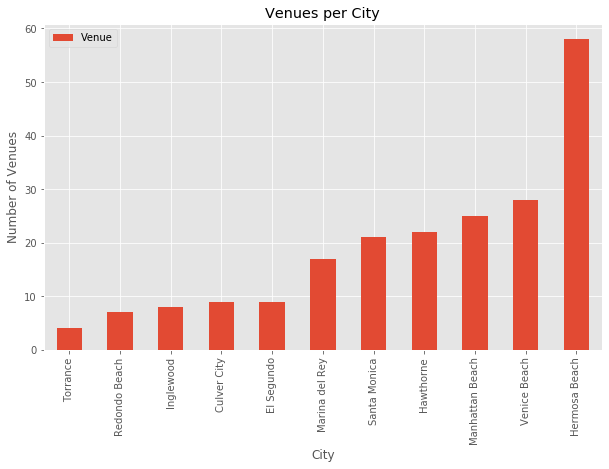

In [40]:

df3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venues per City') # add title to the plot

plt.show()

In [41]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [42]:

df4 = pd.read_excel('LAcoor2.xlsx', sheetname='Sheet3')
df4
df4  #df4.drop(columns=['Unnamed: 0', 'City', 'Latitude','Longitude'])


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Unnamed: 0,City,Latitude,Longitude,Population,Median Age,Average Income,Venue Number,Latitude.1,Longitude.1
0,1,Culver City,34.005820,-118.396781,39283,40.9,86997,9,34.005820,-118.396781
1,2,El Segundo,33.917145,-118.401554,16853,38.7,92942,11,33.917145,-118.401554
2,3,Hawthorne,33.914775,-118.348083,87854,33.0,47636,23,33.914775,-118.348083
3,4,Hermosa Beach,33.865268,-118.396297,19708,39.5,124849,66,33.865268,-118.396297
4,5,Inglewood,33.956068,-118.344274,110598,34.5,46389,8,33.956068,-118.344274
5,6,Manhattan Beach,33.889632,-118.397370,35924,43.7,148899,26,33.889632,-118.397370
6,7,Marina del Rey,33.981510,-118.453229,8866,39.0,101860,20,33.981510,-118.453229
7,8,Redondo Beach,33.856817,-118.377137,67908,40.2,104548,8,33.856817,-118.377137
8,9,Santa Monica,34.023413,-118.481666,92306,40.5,86084,21,34.023413,-118.481666
9,10,Torrance,33.834966,-118.341431,146758,41.7,85070,4,33.834966,-118.341431


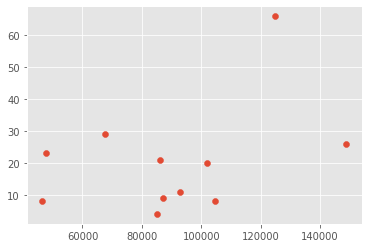

In [43]:
plt.scatter(df4['Average Income'],df4['Venue Number'])

In [44]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
y_predicted = km.fit_predict(df4[['Average Income', 'Venue Number']])
y_predicted

array([0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2], dtype=int32)

In [46]:
df4['cluster'] = y_predicted

df4['Median Age'] = df4['Median Age'].astype(int)

df4['Population'] = df4['Population'].astype(float)
df4['Median Age'] = df4['Median Age'].astype(float)
df4['Average Income'] = df4['Average Income'].astype(float)
df4['Venue Number'] = df4['Venue Number'].astype(float)
df4['cluster'] = df4['cluster'].astype(float)
df4.dtypes

Unnamed: 0          int64
City               object
Latitude          float64
Longitude         float64
Population        float64
Median Age        float64
Average Income    float64
Venue Number      float64
Latitude.1        float64
Longitude.1       float64
cluster           float64
dtype: object

No handles with labels found to put in legend.


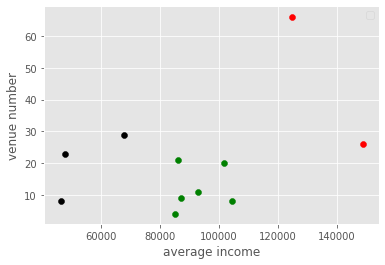

In [47]:
df41 = df4[df4.cluster==0]
df42 = df4[df4.cluster==1]
df43 = df4[df4.cluster==2]

plt.scatter(df41['Average Income'],df41['Venue Number'],color='green')
plt.scatter(df42['Average Income'],df42['Venue Number'],color='red')
plt.scatter(df43['Average Income'],df43['Venue Number'],color='black')

plt.xlabel('average income')
plt.ylabel('venue number')
plt.legend()

In [48]:
scaler = MinMaxScaler()
scaler.fit(df4[['Average Income']])
df4['Average Income'] = scaler.transform(df4[['Average Income']])

scaler.fit(df4[['Venue Number']])
df4['Venue Number'] = scaler.transform(df4[['Venue Number']])

df4

,Unnamed: 0,City,Latitude,Longitude,Population,Median Age,Average Income,Venue Number,Latitude.1,Longitude.1,cluster
0,1,Culver City,34.005820,-118.396781,39283.0,40.0,0.396137,0.080645,34.005820,-118.396781,0.0
1,2,El Segundo,33.917145,-118.401554,16853.0,38.0,0.454131,0.112903,33.917145,-118.401554,0.0
2,3,Hawthorne,33.914775,-118.348083,87854.0,33.0,0.012165,0.306452,33.914775,-118.348083,2.0
3,4,Hermosa Beach,33.865268,-118.396297,19708.0,39.0,0.765389,1.000000,33.865268,-118.396297,1.0
4,5,Inglewood,33.956068,-118.344274,110598.0,34.0,0.000000,0.064516,33.956068,-118.344274,2.0
5,6,Manhattan Beach,33.889632,-118.397370,35924.0,43.0,1.000000,0.354839,33.889632,-118.397370,1.0
6,7,Marina del Rey,33.981510,-118.453229,8866.0,39.0,0.541128,0.258065,33.981510,-118.453229,0.0
7,8,Redondo Beach,33.856817,-118.377137,67908.0,40.0,0.567350,0.064516,33.856817,-118.377137,0.0
8,9,Santa Monica,34.023413,-118.481666,92306.0,40.0,0.387231,0.274194,34.023413,-118.481666,0.0
9,10,Torrance,33.834966,-118.341431,146758.0,41.0,0.377339,0.000000,33.834966,-118.341431,0.0


In [96]:
df4

,Unnamed: 0,City,Latitude,Longitude,Population,Median Age,Average Income,Venue Number,Latitude.1,Longitude.1,cluster
0,1,Culver City,34.005820,-118.396781,39283.0,40.0,0.396137,0.080645,34.005820,-118.396781,0.0
1,2,El Segundo,33.917145,-118.401554,16853.0,38.0,0.454131,0.112903,33.917145,-118.401554,0.0
2,3,Hawthorne,33.914775,-118.348083,87854.0,33.0,0.012165,0.306452,33.914775,-118.348083,1.0
3,4,Hermosa Beach,33.865268,-118.396297,19708.0,39.0,0.765389,1.000000,33.865268,-118.396297,2.0
4,5,Inglewood,33.956068,-118.344274,110598.0,34.0,0.000000,0.064516,33.956068,-118.344274,1.0
5,6,Manhattan Beach,33.889632,-118.397370,35924.0,43.0,1.000000,0.354839,33.889632,-118.397370,2.0
6,7,Marina del Rey,33.981510,-118.453229,8866.0,39.0,0.541128,0.258065,33.981510,-118.453229,0.0
7,8,Redondo Beach,33.856817,-118.377137,67908.0,40.0,0.567350,0.064516,33.856817,-118.377137,0.0
8,9,Santa Monica,34.023413,-118.481666,92306.0,40.0,0.387231,0.274194,34.023413,-118.481666,0.0
9,10,Torrance,33.834966,-118.341431,146758.0,41.0,0.377339,0.000000,33.834966,-118.341431,0.0


In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df4[['Average Income', 'Venue Number']])
y_predicted

array([2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1], dtype=int32)

In [50]:
df4['cluster'] = y_predicted
df4

,Unnamed: 0,City,Latitude,Longitude,Population,Median Age,Average Income,Venue Number,Latitude.1,Longitude.1,cluster
0,1,Culver City,34.005820,-118.396781,39283.0,40.0,0.396137,0.080645,34.005820,-118.396781,2
1,2,El Segundo,33.917145,-118.401554,16853.0,38.0,0.454131,0.112903,33.917145,-118.401554,2
2,3,Hawthorne,33.914775,-118.348083,87854.0,33.0,0.012165,0.306452,33.914775,-118.348083,1
3,4,Hermosa Beach,33.865268,-118.396297,19708.0,39.0,0.765389,1.000000,33.865268,-118.396297,0
4,5,Inglewood,33.956068,-118.344274,110598.0,34.0,0.000000,0.064516,33.956068,-118.344274,1
5,6,Manhattan Beach,33.889632,-118.397370,35924.0,43.0,1.000000,0.354839,33.889632,-118.397370,0
6,7,Marina del Rey,33.981510,-118.453229,8866.0,39.0,0.541128,0.258065,33.981510,-118.453229,2
7,8,Redondo Beach,33.856817,-118.377137,67908.0,40.0,0.567350,0.064516,33.856817,-118.377137,2
8,9,Santa Monica,34.023413,-118.481666,92306.0,40.0,0.387231,0.274194,34.023413,-118.481666,2
9,10,Torrance,33.834966,-118.341431,146758.0,41.0,0.377339,0.000000,33.834966,-118.341431,2


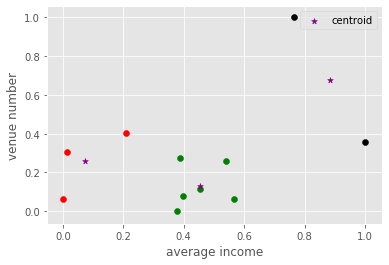

In [56]:
df41 = df4[df4.cluster==0]
df42 = df4[df4.cluster==1]
df43 = df4[df4.cluster==2]

plt.scatter(df41['Average Income'],df41['Venue Number'],color='green')
plt.scatter(df42['Average Income'],df42['Venue Number'],color='red')
plt.scatter(df43['Average Income'],df43['Venue Number'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('average income')
plt.ylabel('venue number')
plt.legend()

In [145]:
km.cluster_centers_

array([[0.07317985, 0.25806452],
       [0.4538858 , 0.13172043],
       [0.88269437, 0.67741935]])

In [146]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df4[['Average Income','Venue Number']])
    sse.append(km.inertia_)

In [102]:
sse

[1.660920796405157,
 0.7406114031140982,
 0.4814789322211169,
 0.18317394389309843,
 0.118949540481645,
 0.06443466711939291,
 0.04069852919238138,
 0.02194063303338859,
 0.009968389069220717]

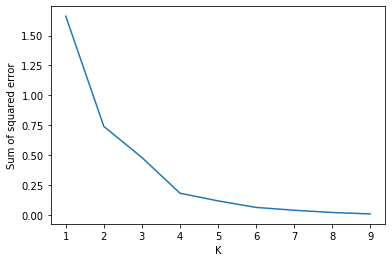

In [103]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [177]:
import requests

return requests.get(url).json()

SyntaxError: 'return' outside function (<ipython-input-177-5ef9d22531fd>, line 3)

In [72]:
import requests

return requests.get(https://github.com/codeforamerica/click_that_hood/blob/master/public/data/los-angeles-county.geojson).json()

SyntaxError: invalid syntax (<ipython-input-72-a0d5fe9924c5>, line 3)

- 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt